In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns



In [2]:
# Run before importing Kmeans to ensure compatibility with certain libraries that might not work well with multiple threads. 

import os 
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Import the dataset

travelrev = pd.read_csv('tripadvisor_review.csv')

In [4]:
#Exploration of the dataset

travelrev.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
travelrev.tail()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46
979,User 980,0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40


In [6]:
# Testing if there are any missing values on the dataset
travelrev.isnull()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
975,False,False,False,False,False,False,False,False,False,False,False
976,False,False,False,False,False,False,False,False,False,False,False
977,False,False,False,False,False,False,False,False,False,False,False
978,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Getting a sneak peak into the dataset structure

travelrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [8]:
# Expressing the statistical values of the dataset
travelrev.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


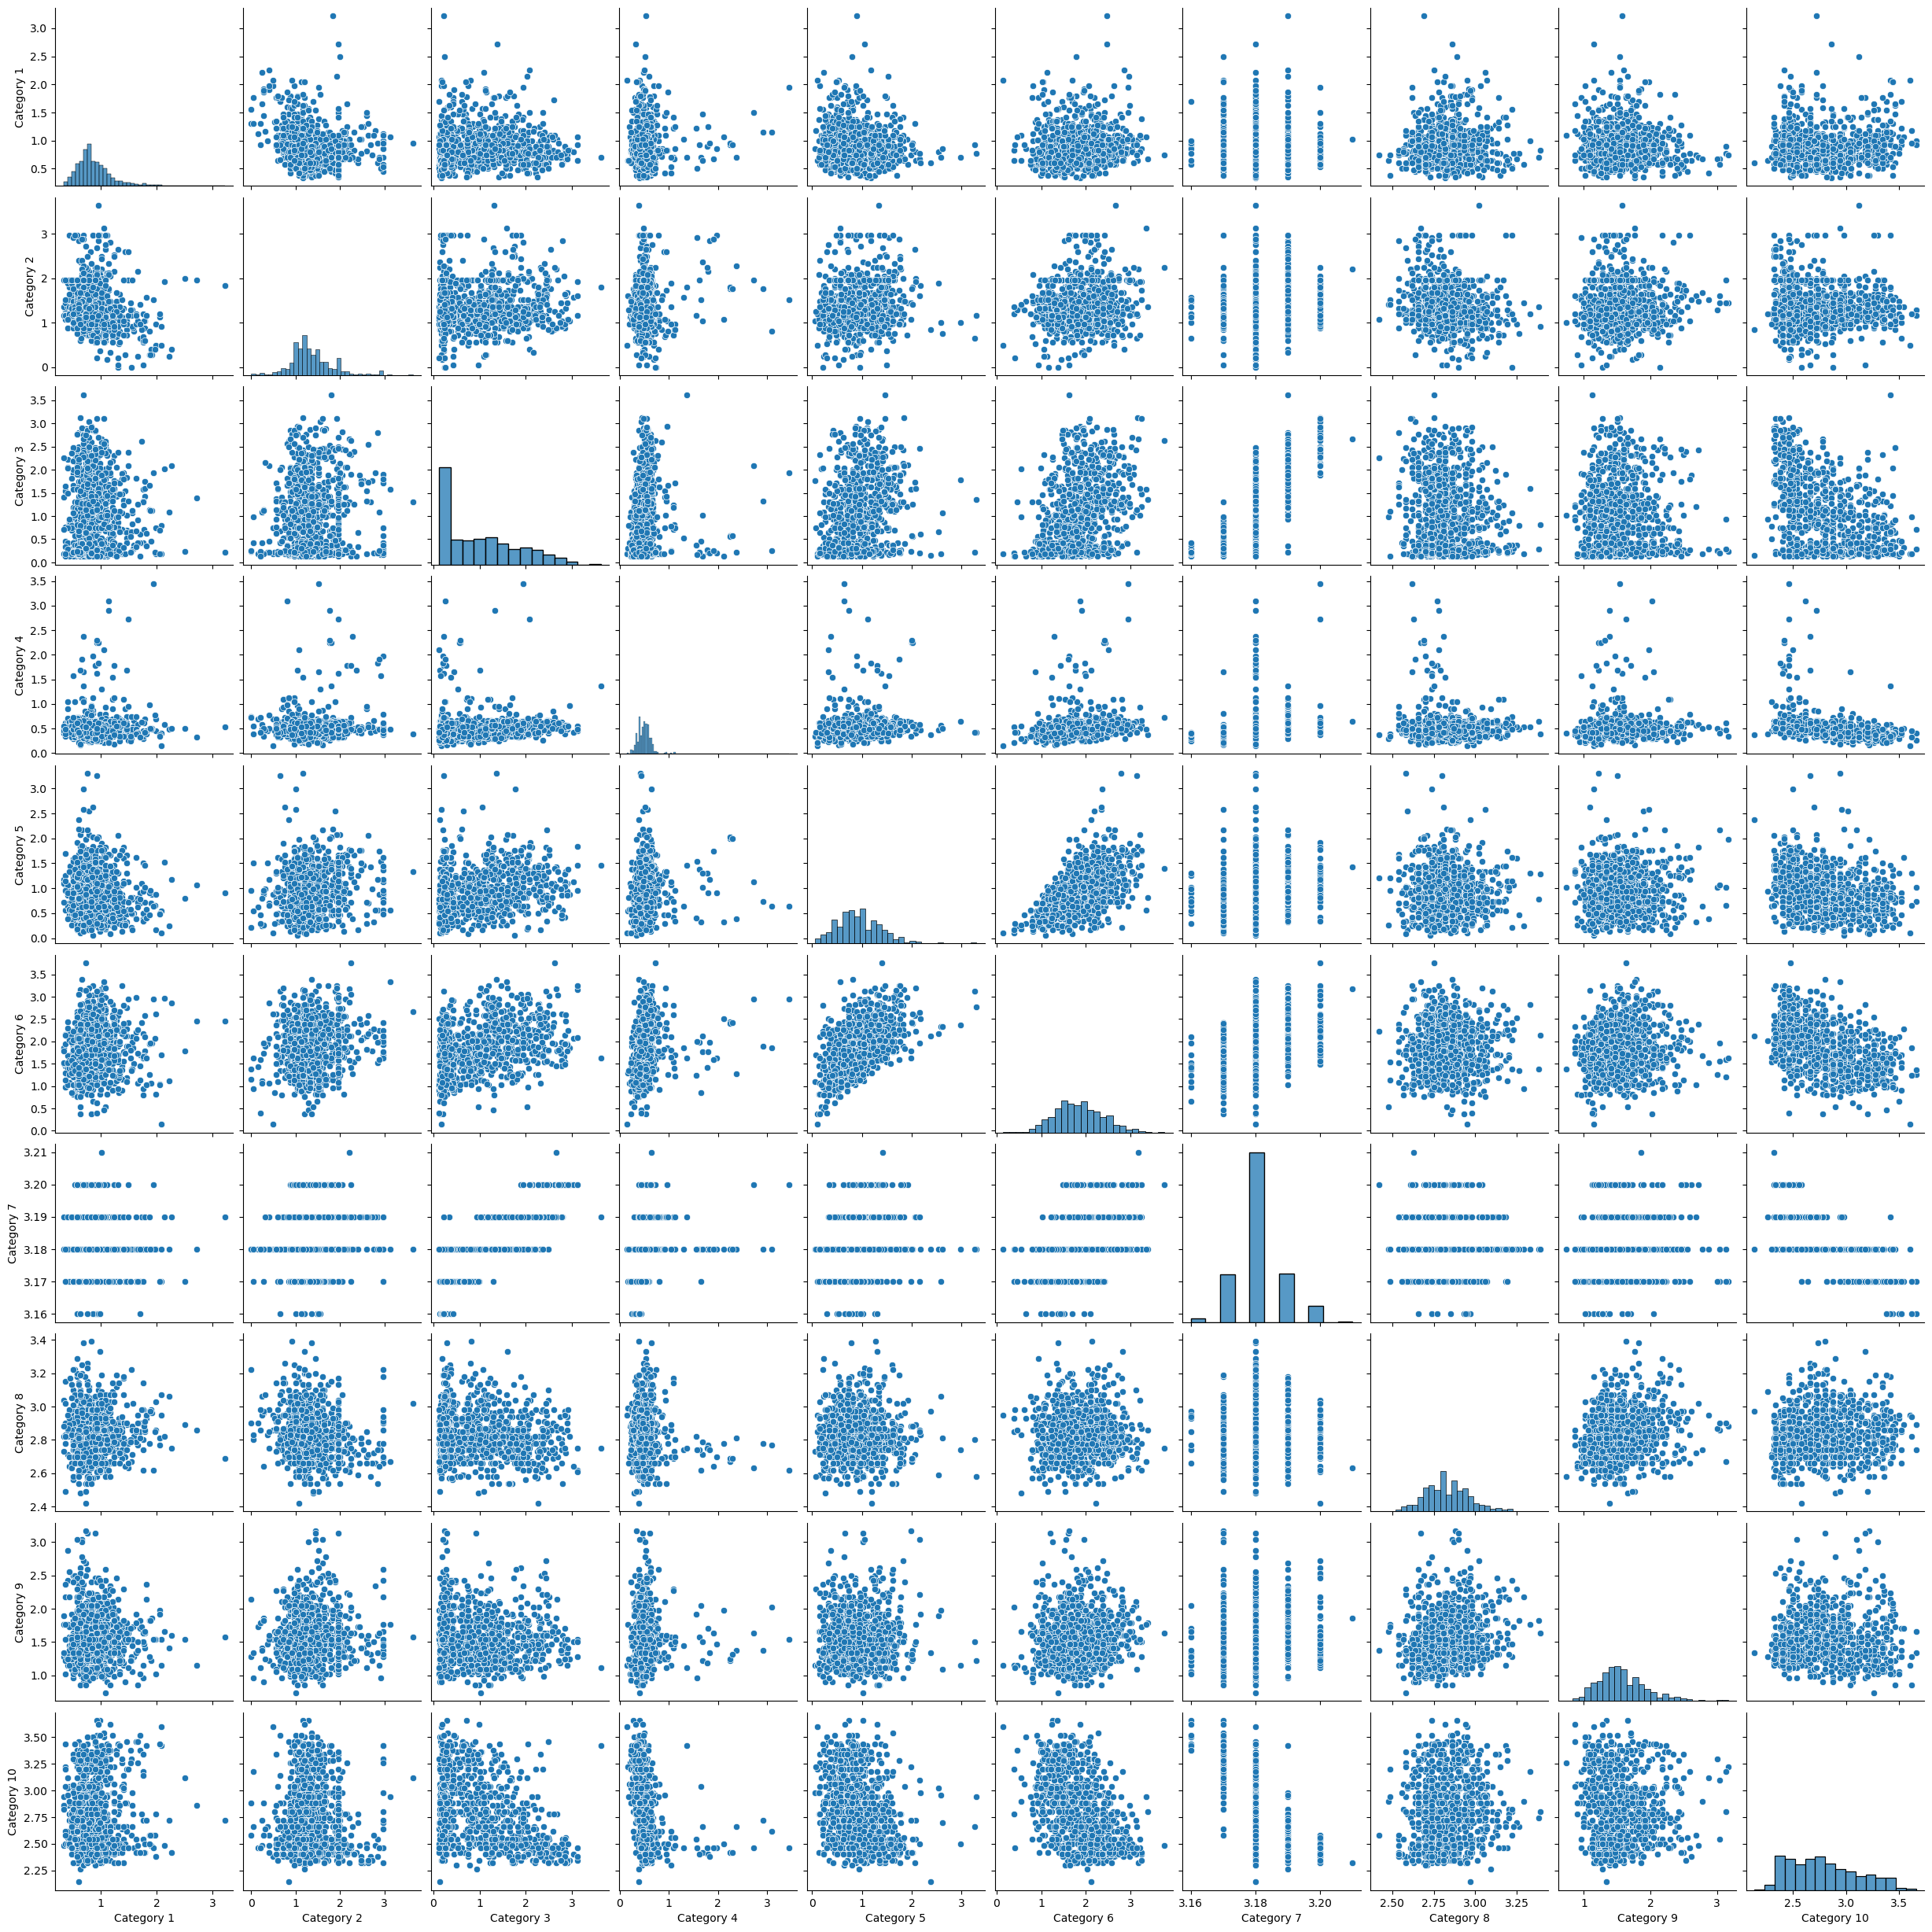

In [9]:
#to view all the dataset using plot

sns.pairplot(travelrev)

In [10]:
# to select the two variables that make up the travel reviews

from sklearn.preprocessing import StandardScaler
X = travelrev.iloc[:, [4,10]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\clus

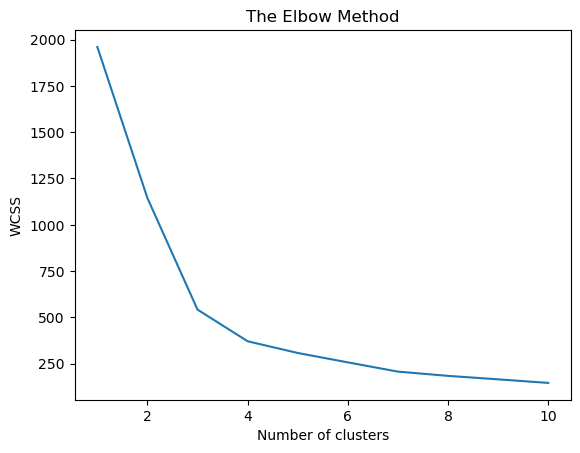

In [11]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Using the fit_predict to train a KMeans() estimator after identifying the number of clusters
# Fit Kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


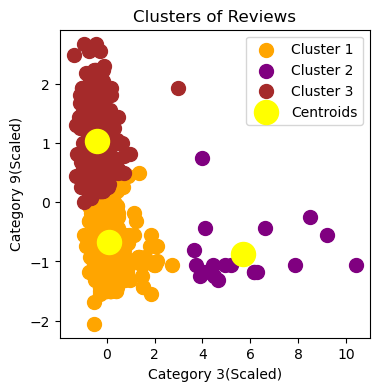

In [13]:
# To visualise the clusters

plt.figure(figsize=(4,4))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Reviews')
plt.xlabel('Category 3(Scaled)')
plt.ylabel('Category 9(Scaled)')
plt.legend()
plt.show()

In [14]:
# To fit the heirarchical clustering to travel reviews dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


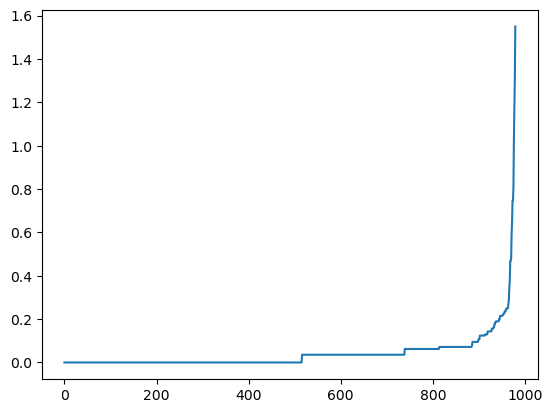

In [15]:
# Using DBSCAN 
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances, axis = 0)
plt.plot(distances)

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples = 3)
y_dbscan = dbscan.fit_predict(X)

In [17]:
y_dbscan

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  2,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

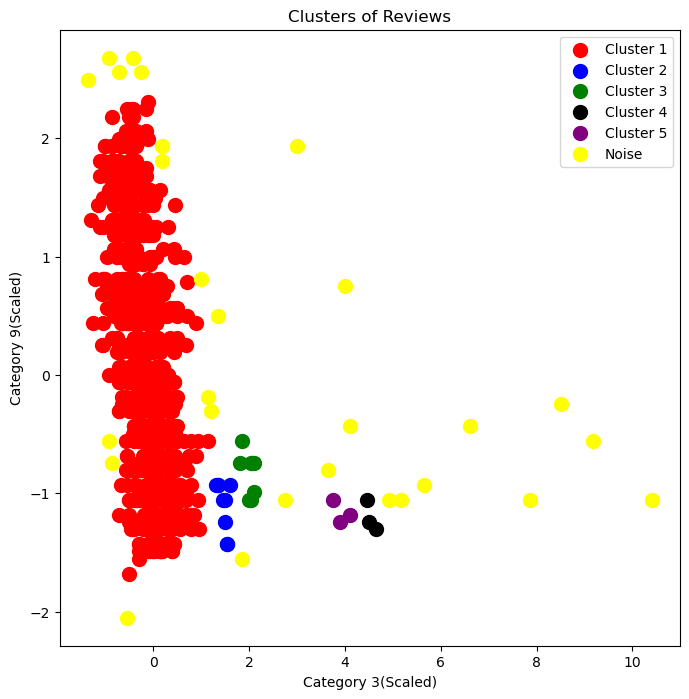

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'yellow', label = 'Noise')
plt.title('Clusters of Reviews')
plt.xlabel('Category 3(Scaled)')
plt.ylabel('Category 9(Scaled)')
plt.legend()
plt.show()

In [19]:
# Clustering data (Travelrev) with higher dimensionality

X = travelrev.iloc[:,1:10]

#scale the data
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\clus

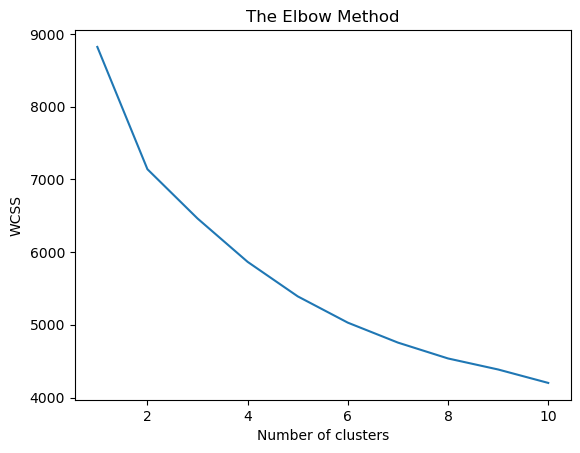

In [20]:
# employing the elbow method to determine the min no of clusters

wcss = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans1.fit(X)
    wcss.append(kmeans1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# At k=2, fit the whole dataset

kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X)

C:\Users\modup\OneDrive\Documents\Anaconda for Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
